In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [3]:
df = pd.read_csv(r"C:\Users\sneha\Downloads\portfolio_data.csv")

In [4]:
df.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/1/2013,248.229996,51.190983,106.250000,30.415714
1,5/2/2013,252.550003,51.987320,98.099998,30.641428
2,5/3/2013,258.049988,52.446388,112.900002,30.492857
3,5/6/2013,255.720001,53.205257,109.599998,30.098572
4,5/7/2013,257.730011,54.151505,113.199997,29.464285


In [5]:
df.shape

(1520, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1520 non-null   object 
 1   AMZN    1520 non-null   float64
 2   DPZ     1520 non-null   float64
 3   BTC     1520 non-null   float64
 4   NFLX    1520 non-null   float64
dtypes: float64(4), object(1)
memory usage: 59.5+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.dtypes

Date    datetime64[ns]
AMZN           float64
DPZ            float64
BTC            float64
NFLX           float64
dtype: object

### Change in price of the stock overtime

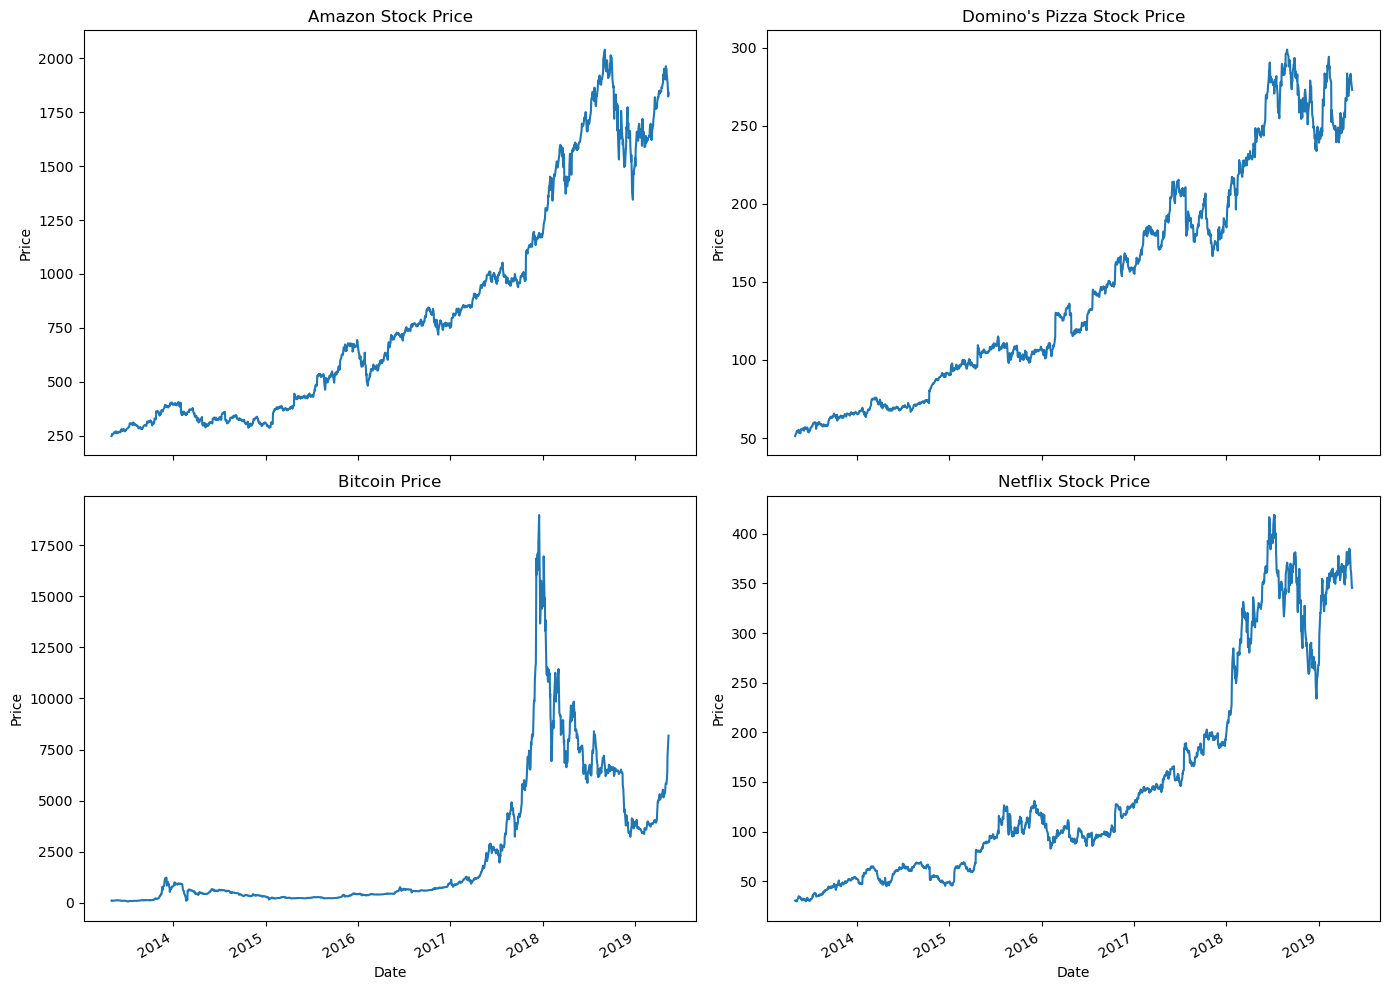

In [9]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot each stock time series
axes[0, 0].plot(df['Date'], df['AMZN'])
axes[0, 0].set_title('Amazon Stock Price')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price')
axes[0, 0].tick_params('x', labelrotation=45)  # Rotate date labels for clarity

axes[0, 1].plot(df['Date'], df['DPZ'])
axes[0, 1].set_title('Domino\'s Pizza Stock Price')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Price')
axes[0, 1].tick_params('x', labelrotation=45)

axes[1, 0].plot(df['Date'], df['BTC'])
axes[1, 0].set_title('Bitcoin Price')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price')
axes[1, 0].tick_params('x', labelrotation=45)

axes[1, 1].plot(df['Date'], df['NFLX'])
axes[1, 1].set_title('Netflix Stock Price')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Price')
axes[1, 1].tick_params('x', labelrotation=45)

# Automatically adjust subplot params for better layout
fig.autofmt_xdate()  # Auto-format the x-axis dates for better fit
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
prices_df = df.copy(deep=True)

### The moving average of the various stocks

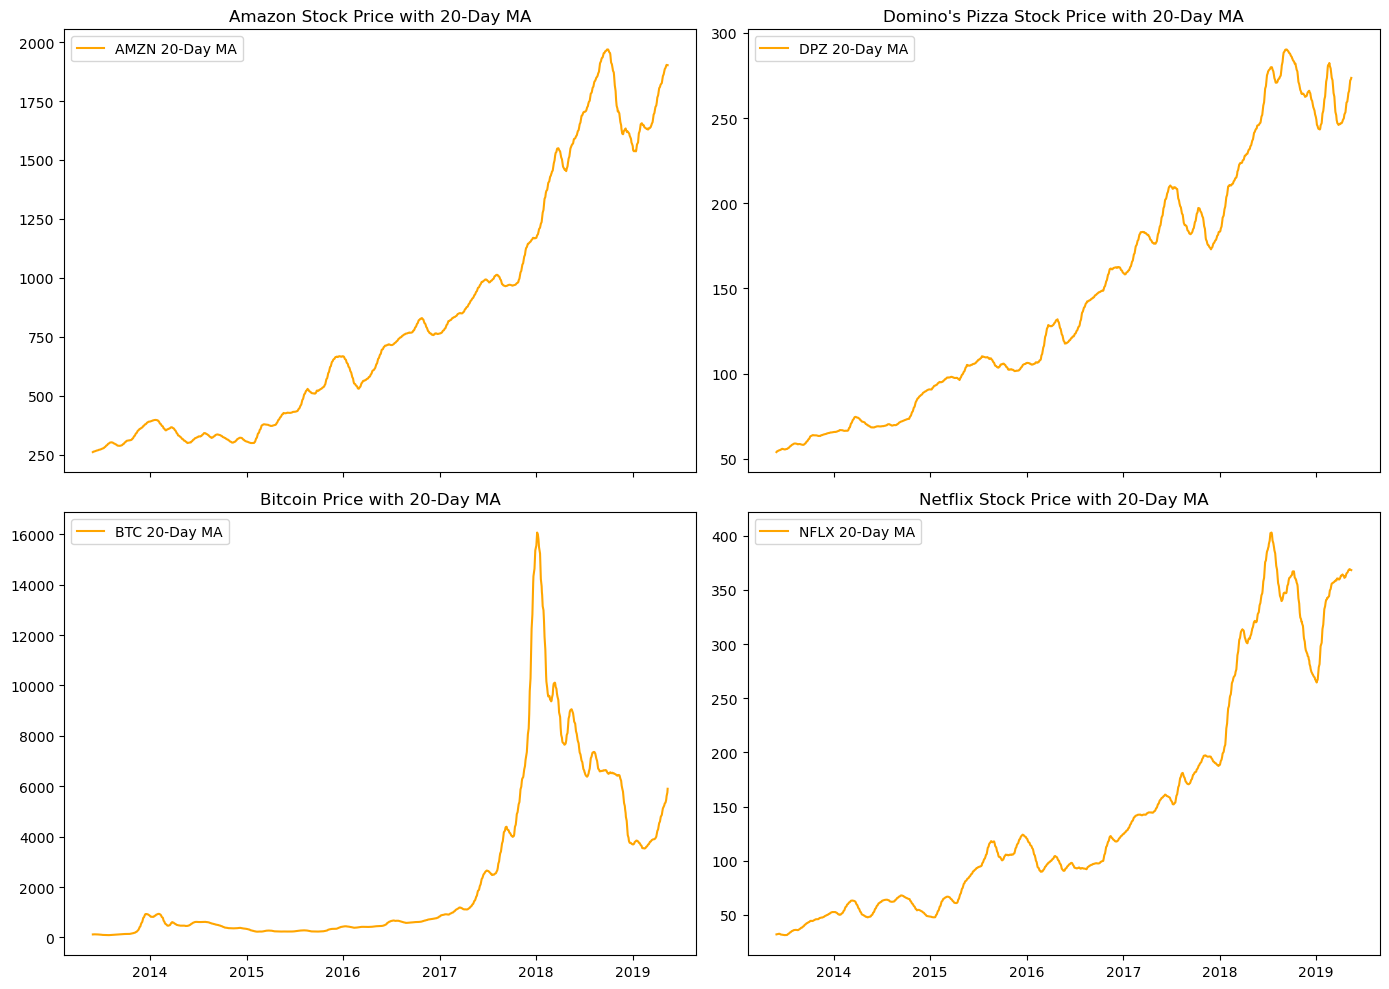

In [11]:
# Calculate 20-day moving averages for the stocks
df['AMZN_MA20'] = df['AMZN'].rolling(window=20).mean()
df['DPZ_MA20'] = df['DPZ'].rolling(window=20).mean()
df['BTC_MA20'] = df['BTC'].rolling(window=20).mean()
df['NFLX_MA20'] = df['NFLX'].rolling(window=20).mean()

# Plot the data with moving averages
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10), sharex=True)


axes[0, 0].plot(df['Date'], df['AMZN_MA20'], label='AMZN 20-Day MA', color='orange')
axes[0, 0].set_title('Amazon Stock Price with 20-Day MA')
axes[0, 0].legend()


axes[0, 1].plot(df['Date'], df['DPZ_MA20'], label='DPZ 20-Day MA', color='orange')
axes[0, 1].set_title('Domino\'s Pizza Stock Price with 20-Day MA')
axes[0, 1].legend()

axes[1, 0].plot(df['Date'], df['BTC_MA20'], label='BTC 20-Day MA', color='orange')
axes[1, 0].set_title('Bitcoin Price with 20-Day MA')
axes[1, 0].legend()

axes[1, 1].plot(df['Date'], df['NFLX_MA20'], label='NFLX 20-Day MA', color='orange')
axes[1, 1].set_title('Netflix Stock Price with 20-Day MA')
axes[1, 1].legend()

# Improve layout and display plot
plt.tight_layout()
plt.show()


From the graphs we observe that Amazon and Netflix exhibit steady growth, indicating continuous business success. Domino's Pizza also grows but more gradually. Bitcoin's price is highly volatile, with sharp rises and falls, showcasing the speculative nature of cryptocurrencies.

### Correlation between different stocks closing prices

<AxesSubplot:>

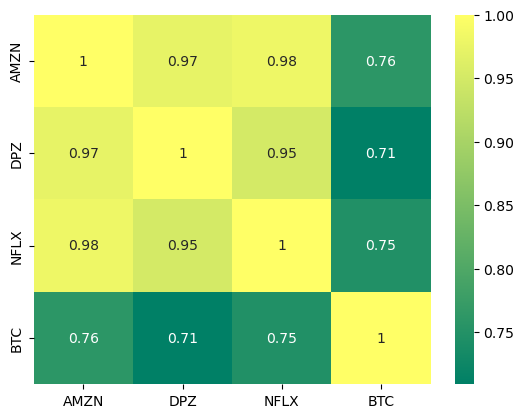

In [12]:
sns.heatmap(df[["AMZN","DPZ","NFLX","BTC"]].corr(), annot=True, cmap='summer')

All the Companies are positively correlated.

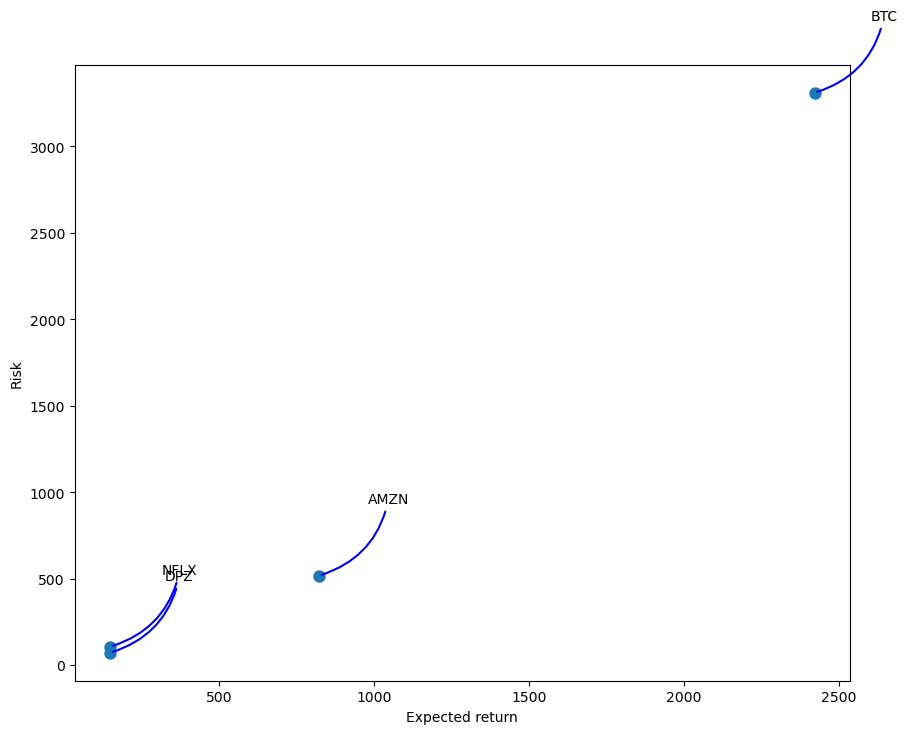

In [18]:
area = np.pi * 20

prices_df.set_index('Date', inplace=True)

plt.figure(figsize=(10, 8))
plt.scatter(prices_df.mean(), prices_df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Assuming 'Date' is the index and not a column anymore
for label, x, y in zip(prices_df.columns, prices_df.mean(), prices_df.std()):
    plt.annotate(label, 
                 xy=(x, y), 
                 xytext=(50, 50), 
                 textcoords='offset points', 
                 ha='center', 
                 va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', lw=1.5, connectionstyle='arc3,rad=-0.3'))

plt.show()


Bitcoin shows the highest risk and expected return, indicating volatility. Amazon and Netflix exhibit lower risk and returns, suggesting more stability. The trend implies higher potential rewards are associated with higher risks.

### Predicting the closing price stock price of Amazon

In [21]:
Amazon_df=df[["Date","AMZN"]]

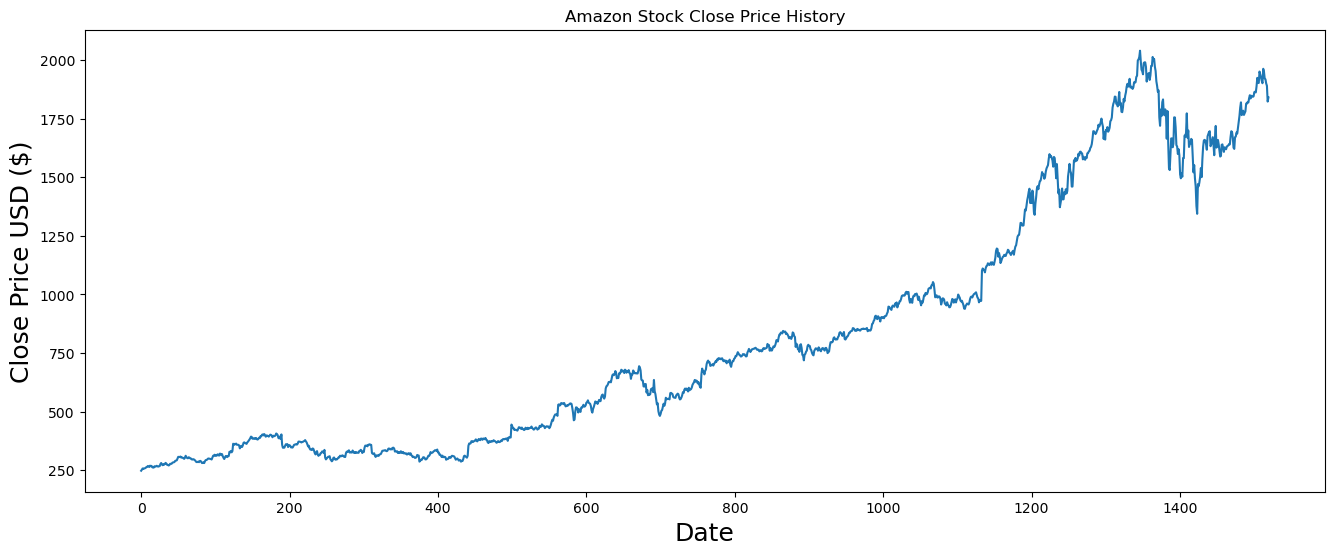

In [23]:
plt.figure(figsize=(16,6))
plt.title('Amazon Stock Close Price History')
plt.plot(df['AMZN'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [24]:
# Create a new dataframe with only the 'Close column 
data = Amazon_df.filter(['AMZN'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1444

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.        ],
       [0.00241169],
       [0.00548211],
       ...,
       [0.91652336],
       [0.87895251],
       [0.88868853]])

In [28]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.        , 0.00241169, 0.00548211, 0.00418137, 0.00530348,
       0.00583382, 0.00666005, 0.00859721, 0.00908848, 0.01122102,
       0.01023291, 0.00887075, 0.01209749, 0.01083025, 0.0115169 ,
       0.00822317, 0.00757558, 0.00754209, 0.01064044, 0.0096579 ,
       0.01038363, 0.01170672, 0.01041155, 0.00975281, 0.01057345,
       0.01094189, 0.01598857, 0.01833326, 0.0148218 , 0.01308562,
       0.01538565, 0.01438077, 0.0166529 , 0.01871847, 0.01670873,
       0.01407374, 0.01402907, 0.01249385, 0.01332008, 0.01637935,
       0.01636818, 0.01644634, 0.01890827, 0.01981824, 0.01998571,
       0.02101849, 0.02364789, 0.02417266, 0.02461926, 0.02871132,
       0.03311598, 0.0325689 , 0.03273637, 0.0337524 , 0.03119556,
       0.03182083, 0.03084387, 0.02949288, 0.02830937, 0.0307992 ])]
[0.03560583130583625]

[array([0.        , 0.00241169, 0.00548211, 0.00418137, 0.00530348,
       0.00583382, 0.00666005, 0.00859721, 0.00908848, 0.01122102,
       0.01023291, 0.00887075, 0.01

In [30]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1384/1384 [==============================] - 43s 29ms/step - loss: 0.0016


In [31]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

3/3 [==============================] - 1s 27ms/step


60.84095475471885

C:\Users\sneha\AppData\Local\Temp\ipykernel_28188\3896972945.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


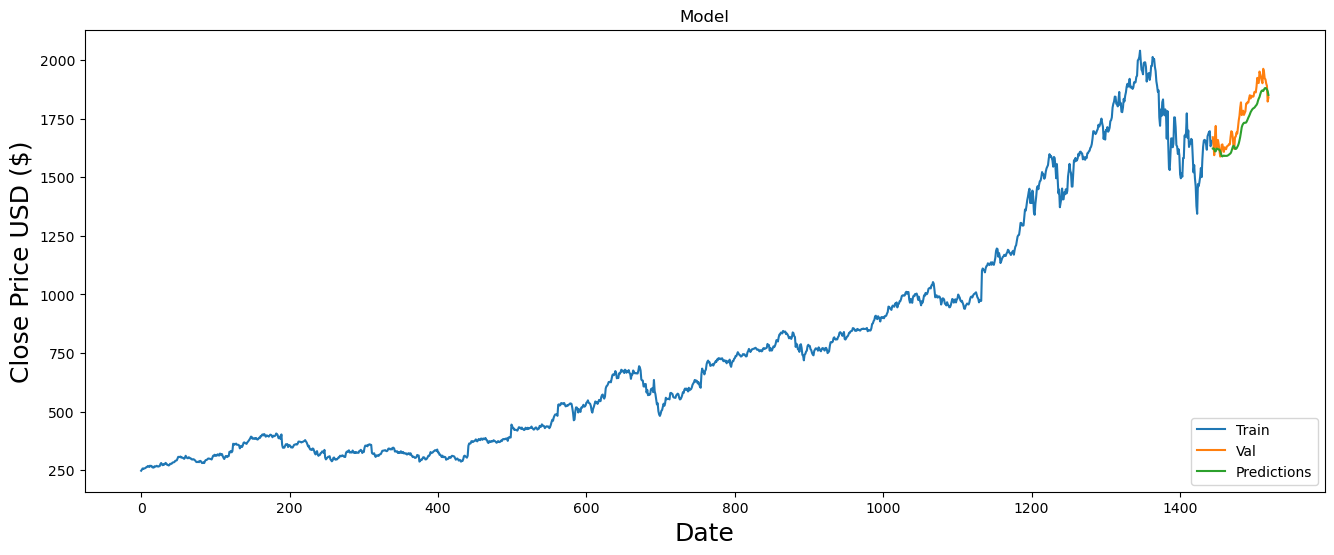

In [33]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['AMZN'])
plt.plot(valid[['AMZN', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [34]:
# Show the valid and predicted prices
valid

,AMZN,Predictions
1444,1670.569946,1622.355591
1445,1637.890015,1623.083130
1446,1593.880005,1620.358032
1447,1670.430054,1610.335205
1448,1718.729980,1610.466187
...,...,...
1515,1917.770020,1880.375488
1516,1899.869995,1878.923340
1517,1889.979980,1874.041870
1518,1822.680054,1867.205933
